**Mall Customers Clustering Analysis**

**Installing the Libraries**

In [1]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\koush\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install dabl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\koush\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
# for basic mathematics operation 
import numpy as np

# for dataframe manipulations
import pandas as pd

# for Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for data analysis
import dabl

**Reading the Dataset**

In [4]:
# importing the dataset
data = pd.read_csv('Mall_Customers.csv')

## Examining Data

In [5]:
# lets check the shape of the dataset
print("Shape of the dataset :", data.shape)

Shape of the dataset : (200, 5)


In [6]:
# lets check the head of the data
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# lets check the tail of the data
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
# lets check sample of the data
data.sample(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
181,182,Female,32,97,86
198,199,Male,32,137,18
183,184,Female,29,98,88


In [9]:
data.drop("CustomerID",inplace = True, axis=1)

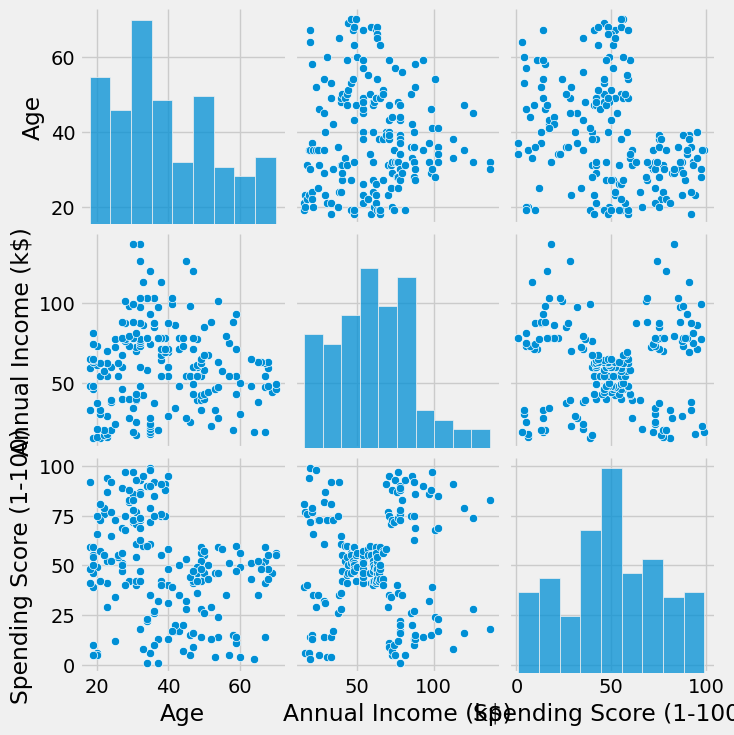

In [10]:
# lets get the pairplot for the data
sns.pairplot(data)
plt.show()

C:\Users\koush\AppData\Local\Temp\ipykernel_19552\3023817853.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, cmap = 'copper')


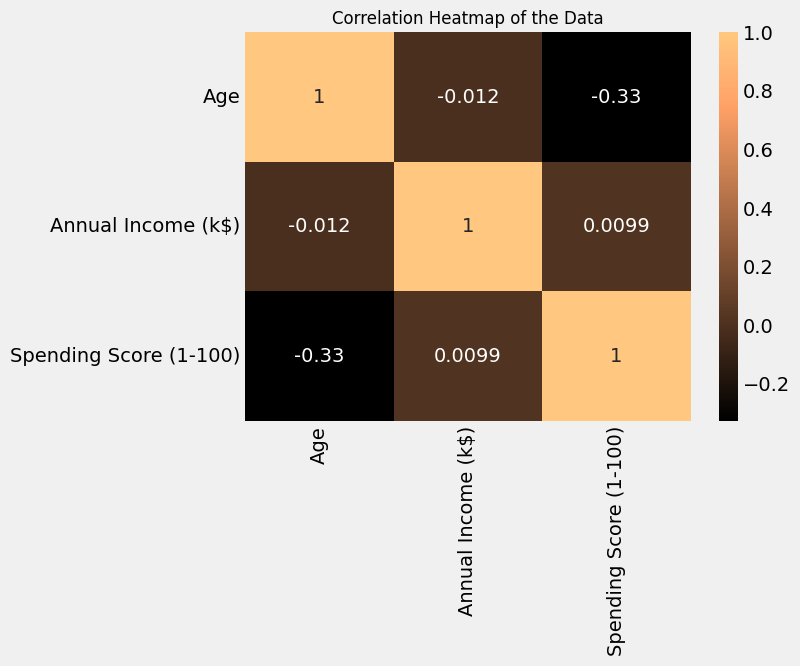

In [11]:
# lets check the Correlation Heat Map of the Data

sns.heatmap(data.corr(), annot = True, cmap = 'copper')
plt.title('Correlation Heatmap of the Data', fontsize = 12)
plt.show()

Target looks like regression


[<AxesSubplot: title={'center': 'Target distribution'}, xlabel='Spending Score (1...', ylabel='frequency'>,
 array([[<AxesSubplot: title={'center': 'F=-3.45E-01'}, xlabel='Age', ylabel='Spending Score (1...'>,
         <AxesSubplot: title={'center': 'F=7.84E-03'}, xlabel='Annual Income (k$)'>]],
       dtype=object),
 array([[<AxesSubplot: title={'center': 'F=8.85E-02'}, xlabel='Spending Score (1-100)', ylabel='Gender'>]],
       dtype=object)]

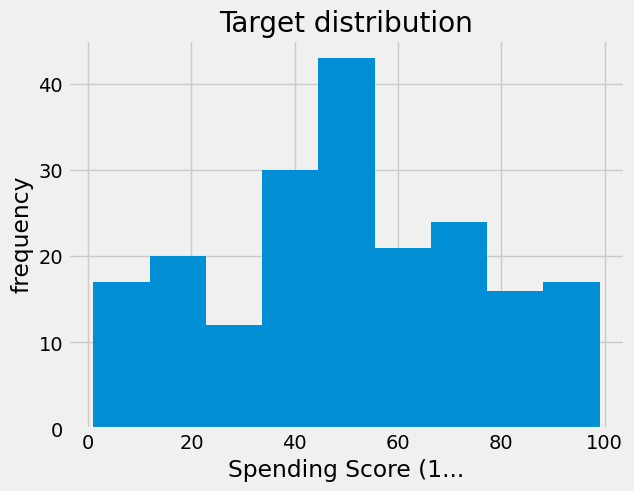

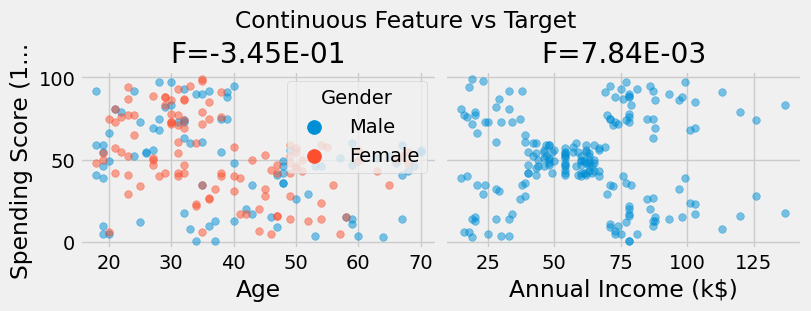

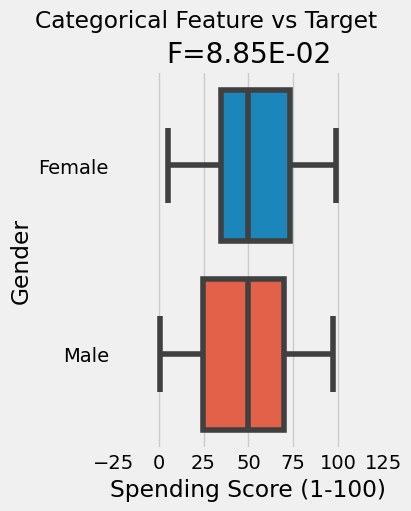

In [12]:
# lets analyze the data with respect to Spending Score
dabl.plot(data, target_col = 'Spending Score (1-100)')

Target looks like regression


[<AxesSubplot: title={'center': 'Target distribution'}, xlabel='Annual Income (k$)', ylabel='frequency'>,
 array([[<AxesSubplot: title={'center': 'F=1.98E-02'}, xlabel='Age', ylabel='Annual Income (k$)'>,
         <AxesSubplot: title={'center': 'F=7.84E-03'}, xlabel='Spending Score (1-100)'>]],
       dtype=object),
 array([[<AxesSubplot: title={'center': 'F=0.00E+00'}, xlabel='Annual Income (k$)', ylabel='Gender'>]],
       dtype=object)]

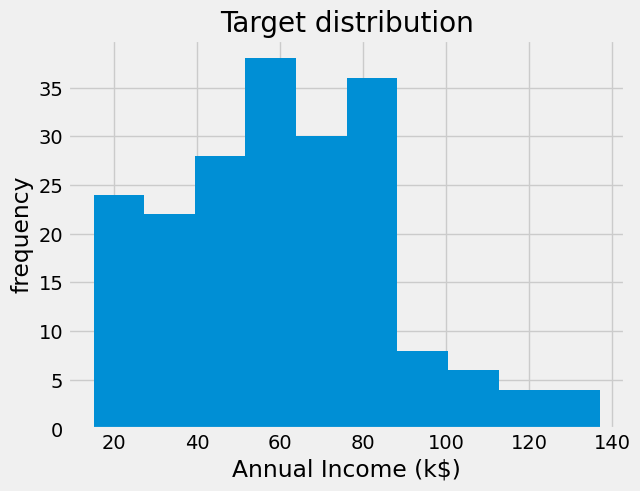

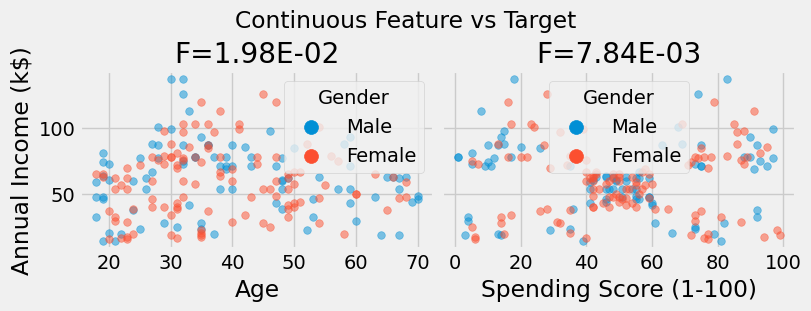

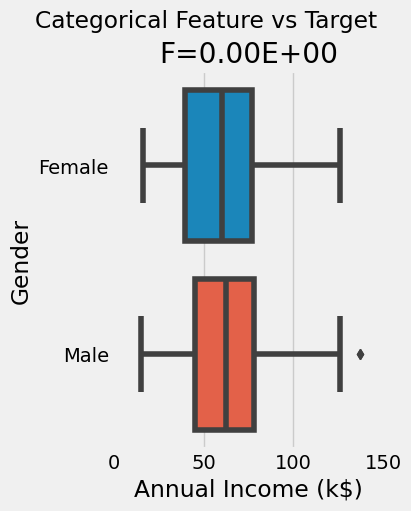

In [13]:
# lets analyze the data with respect to Annual Income
dabl.plot(data, target_col = 'Annual Income (k$)')

## Descriptive Statistics

In [14]:
# describing the data
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [15]:
# describing the categorical data
data.describe(include = 'object')

,Gender
count,200
unique,2
top,Female
freq,112


In [16]:
# checking if there is any NULL data
data.isnull().any().any()

False

## Data Visualization

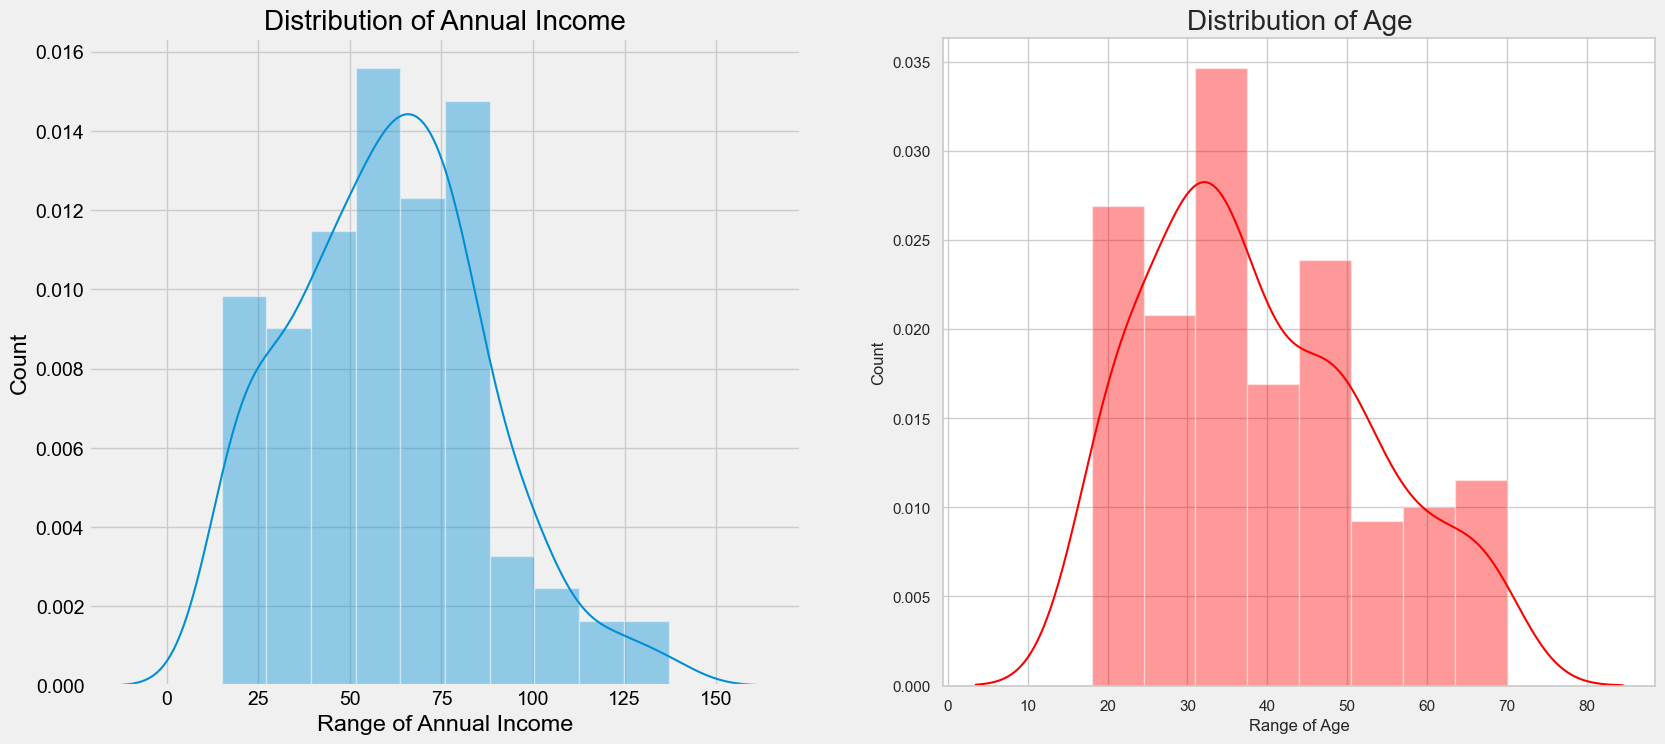

In [17]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

> Here, In the above Plots we can see the Distribution pattern of Annual Income and Age, By looking at the plots, 

>> we can infer one thing that There are few people who earn more than 100 US Dollars.
>> Most of the people have an earning of around 50-75 US Dollars.
>> Also, we can say that the least Income is around 20 US Dollars.

> Taking inferences about the Customers.
>> The most regular customers for the Mall has age around 30-35 years of age.
>> Whereas the the senior citizens age group is the least frequent visitor in the Mall.
>> Youngsters are lesser in umber as compared to the Middle aged people.


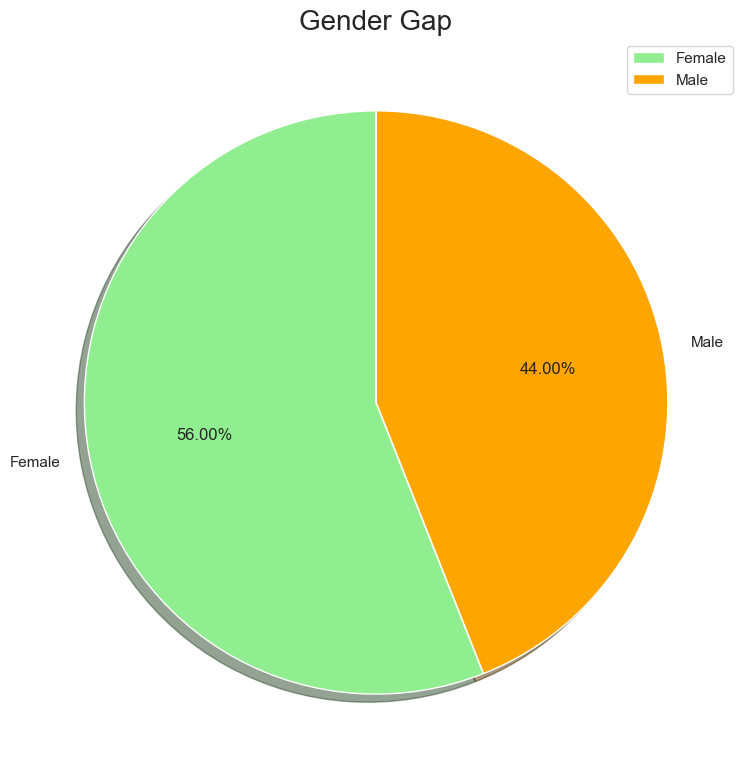

In [18]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.001]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('Gender Gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

> By looking at the above pie chart which explains about the distribution of Gender in the Mall
>> Interestingly, The Females are in the lead with a share of 56% whereas the Males have a share of 44%, that's a huge gap specially when the population of Males is comparatively higher than Females.

In [19]:
ag = data["Age"].value_counts()


<AxesSubplot: >

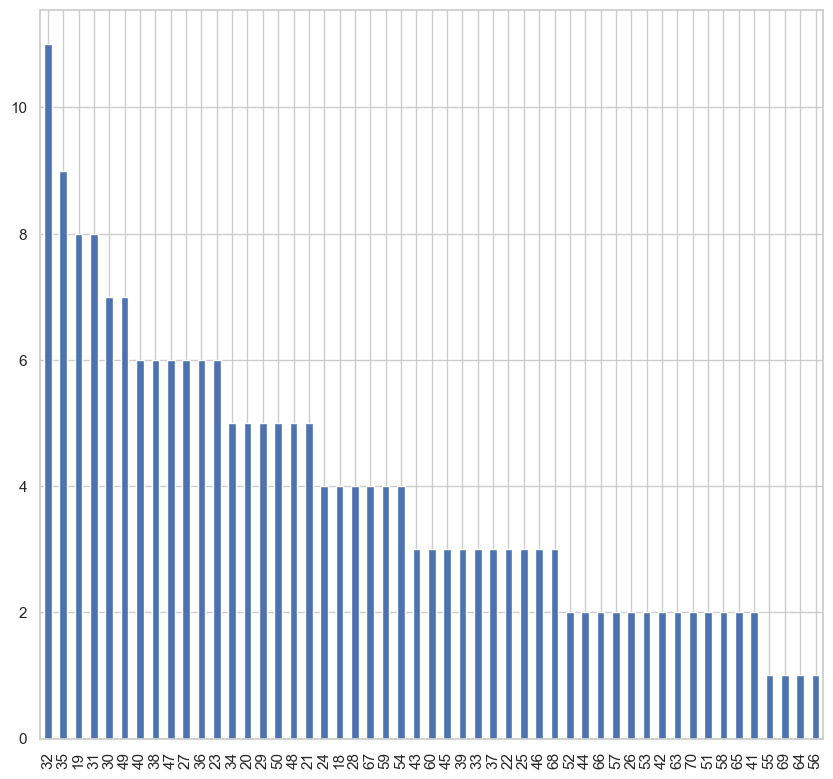

In [20]:
ag.plot(kind='bar')

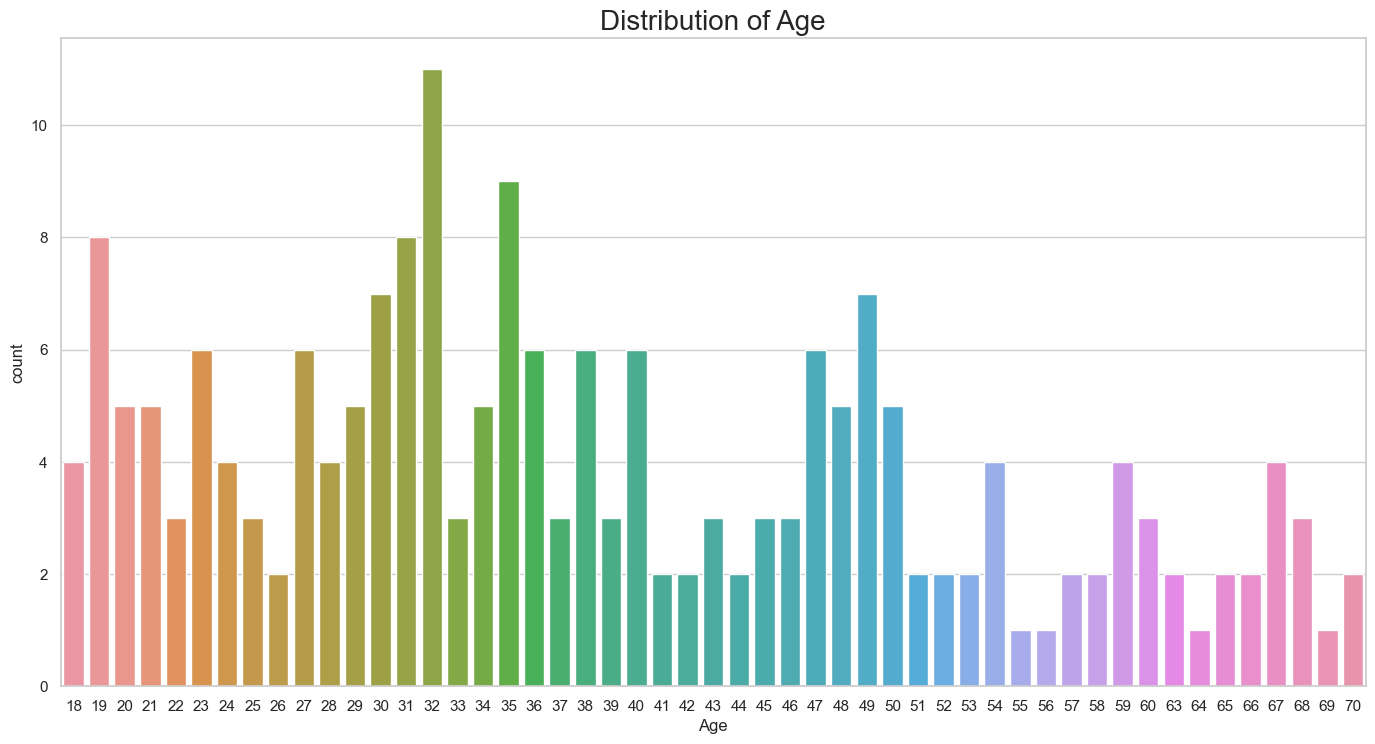

In [21]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(data=data,x="Age")
plt.title('Distribution of Age', fontsize = 20)
plt.show()

> This Graph shows a more Interactive Chart about the distribution of each Age Group in the Mall for more clariy about the Visitor's Age Group in the Mall.
>> By looking at the above graph-, It can be seen that the Ages from 27 to 39 are very much frequent but there is no clear pattern, we can only find some group wise patterns such as the the older age groups are lesser frequent in comparison.
>> Interesting Fact, There are equal no. of Visitors in the Mall for the Agee 18 and 67.
>> People of Age 55, 56, 69, 64 are very less frequent in the Malls.
>> People at Age 32 are the Most Frequent Visitors in the Mall.

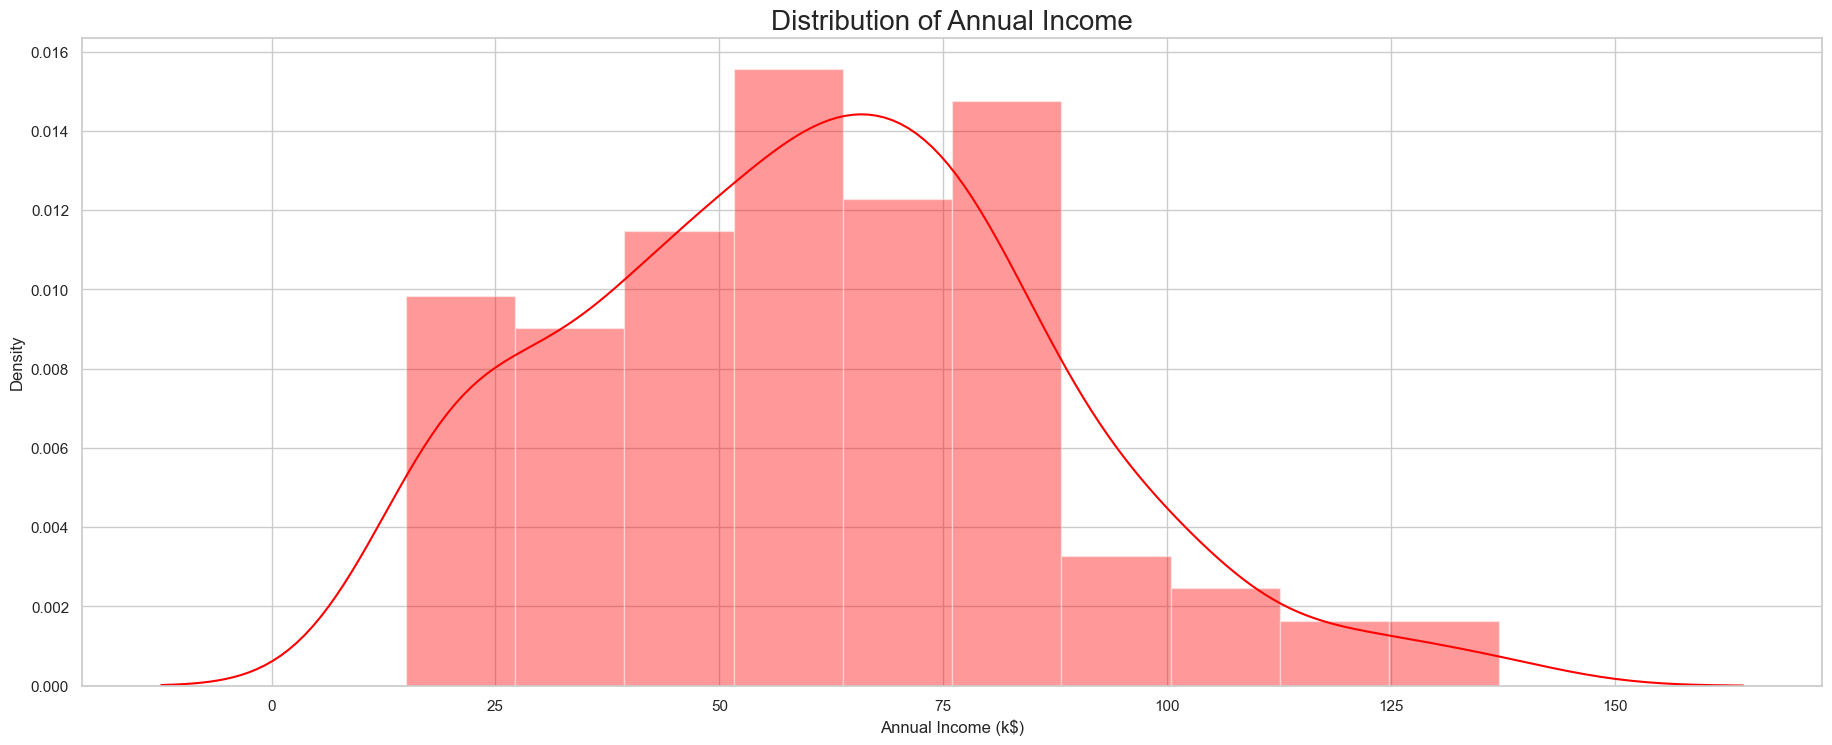

In [22]:
# lets check the sitribution of Annual Income

plt.rcParams['figure.figsize'] = (20, 8)
sns.distplot(data['Annual Income (k$)'], color = 'red')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

> Again, This is also a chart to better explain the Distribution of Each Income level, Interesting there are customers in the mall with a very much comparable freqyuency with their Annual Income ranging from 15 US Dollars to 137K US Dollars.
> There are more Customers in the Mall whoc have their Annual Income as 54k US Dollars or 78 US Dollars.

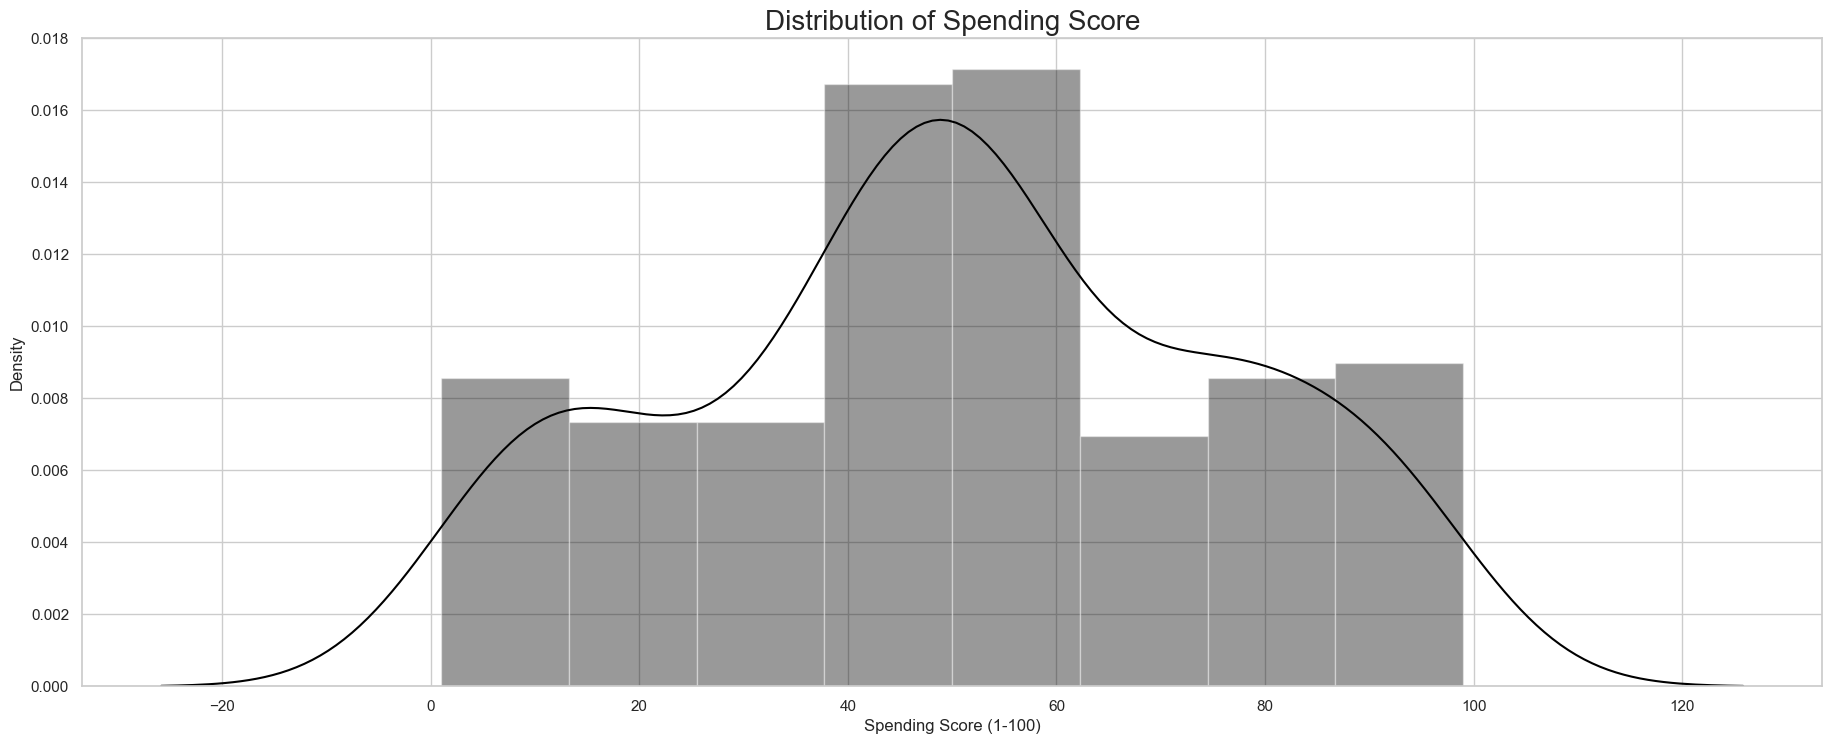

In [23]:
# lets check the distribution of Spending Score

plt.rcParams['figure.figsize'] = (20, 8)
sns.distplot(data['Spending Score (1-100)'], color = 'black')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

> This is the Most Important Chart in the perspective of Mall, as It is very Important to have some intuition and idea about the Spending Score of the Customers Visiting the Mall.
>> On a general level, we may conclude that most of the Customers have their Spending Score in the range of 35-60.
>> Interesting there are customers having I spending score also, and 99 Spending score also, Which shows that the mall caters to the variety of Customers with Varying needs and requirements available in the Mall.

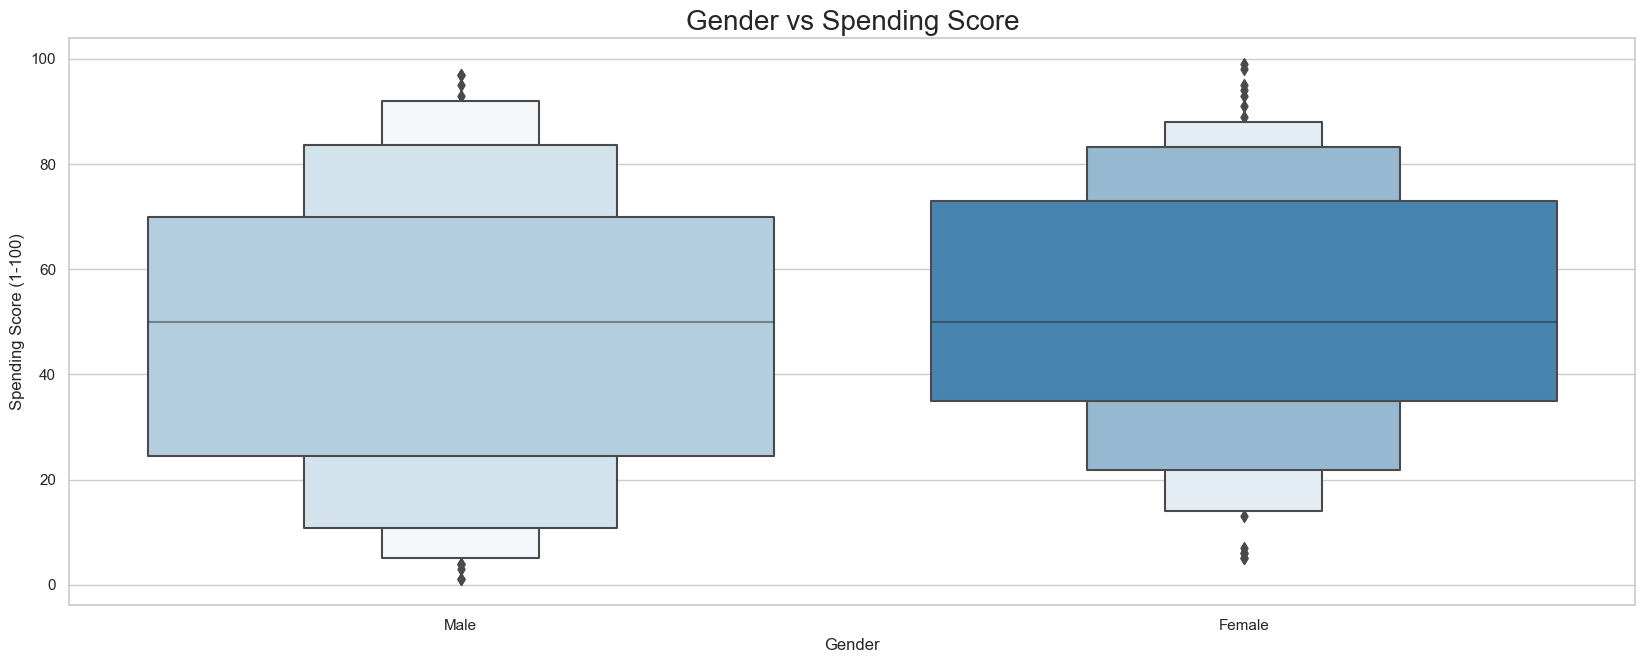

In [24]:
#  Gender vs Spendscore

plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data=data,x='Gender', y='Spending Score (1-100)', palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

> Bi-variate Analysis between Gender and Spending Score, 
>> It is clearly visible that the most of the males have a Spending Score of around 25k US Dollars to 70k US Dollars whereas the Females have a spending score of around 35k US Dollars to 75k US Dollars. which again points to the fact that women are Shopping Leaders.

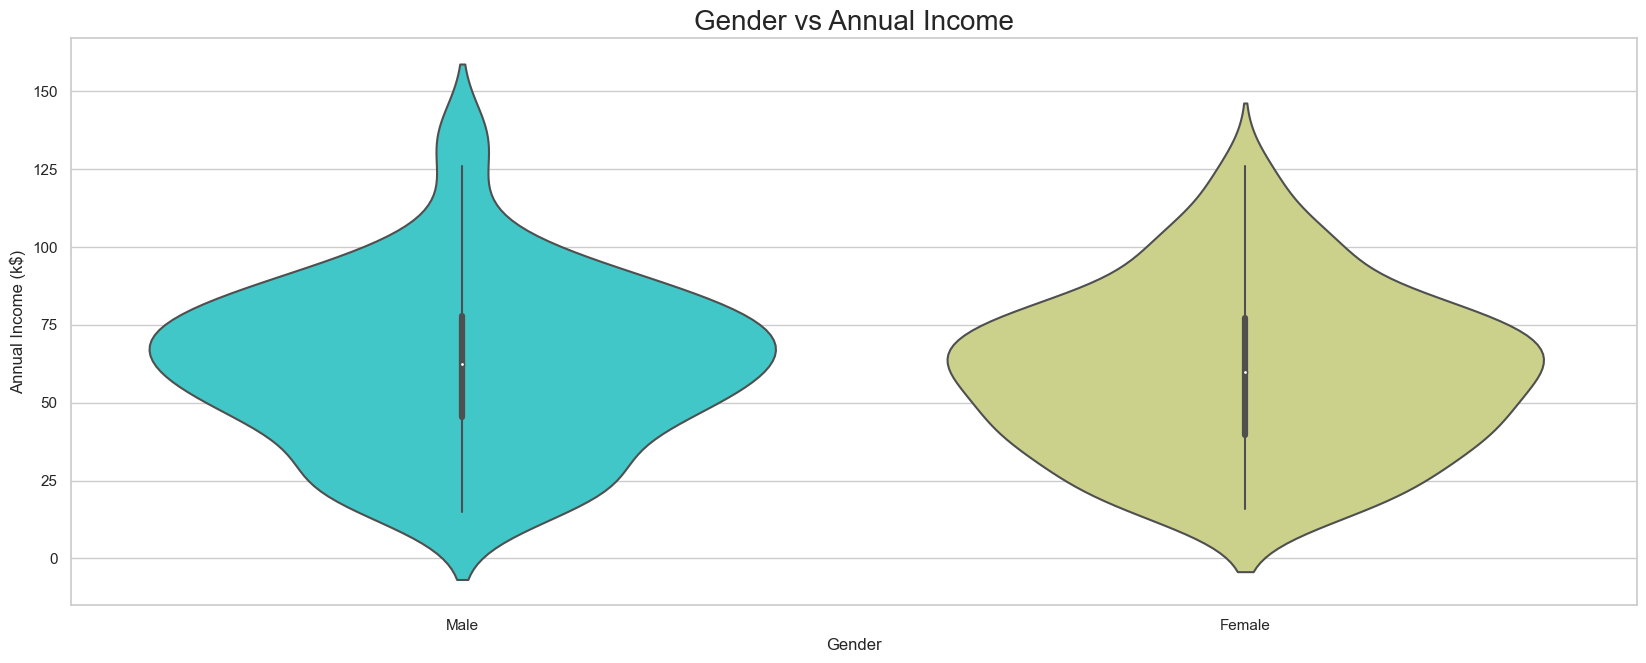

In [25]:
## Gender vs Annual Income

plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(data,x='Gender', y='Annual Income (k$)', palette = 'rainbow')
plt.title('Gender vs Annual Income', fontsize = 20)
plt.show()

> Again a Bivariate Analysis between the Gender and the Annual Income, to better visualize the Income of the different Genders.
>> There are more number of males who get paid more than females. But, The number of males and females are equal in number when it comes to low annual income. 

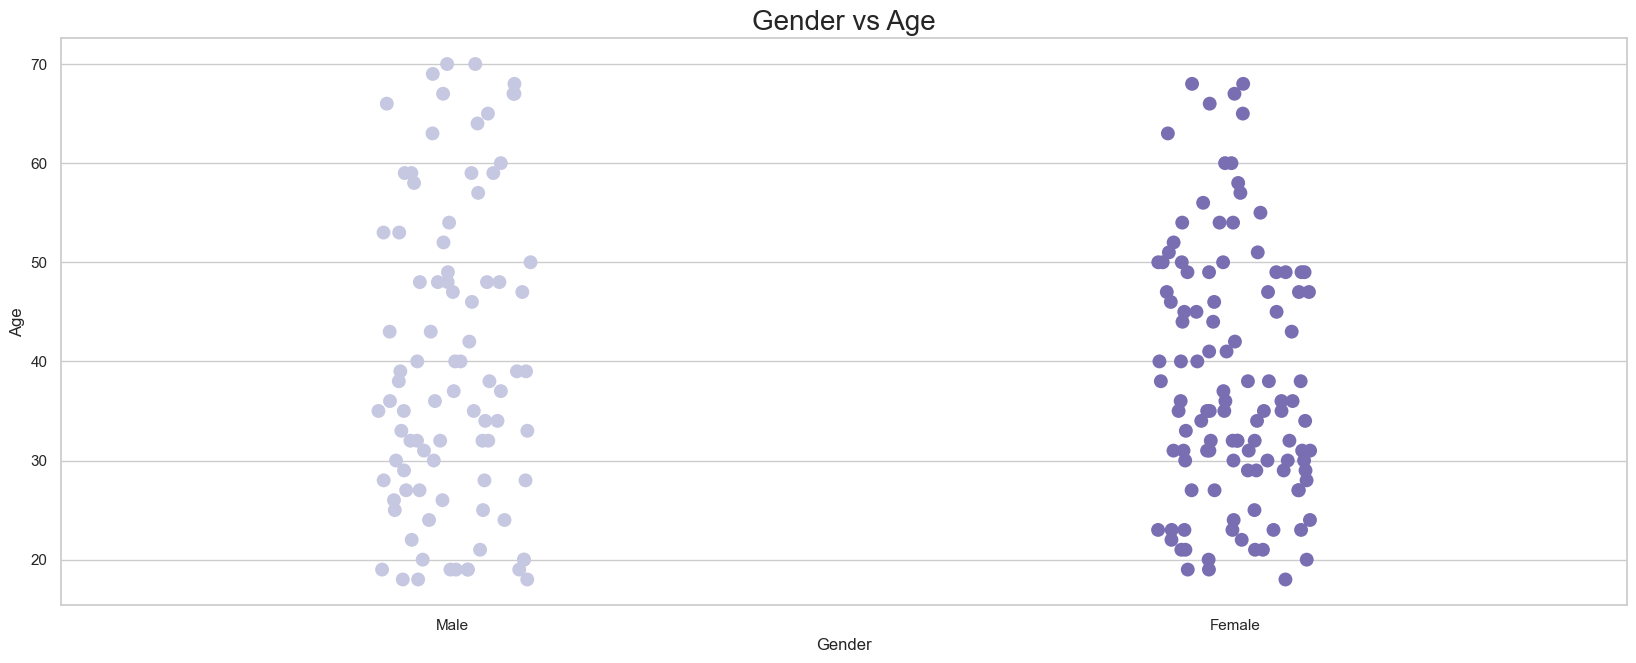

In [26]:
# Gender vs Age

plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(data,x= 'Gender', y='Age', palette = 'Purples', size = 10)
plt.title('Gender vs Age', fontsize = 20)
plt.show()

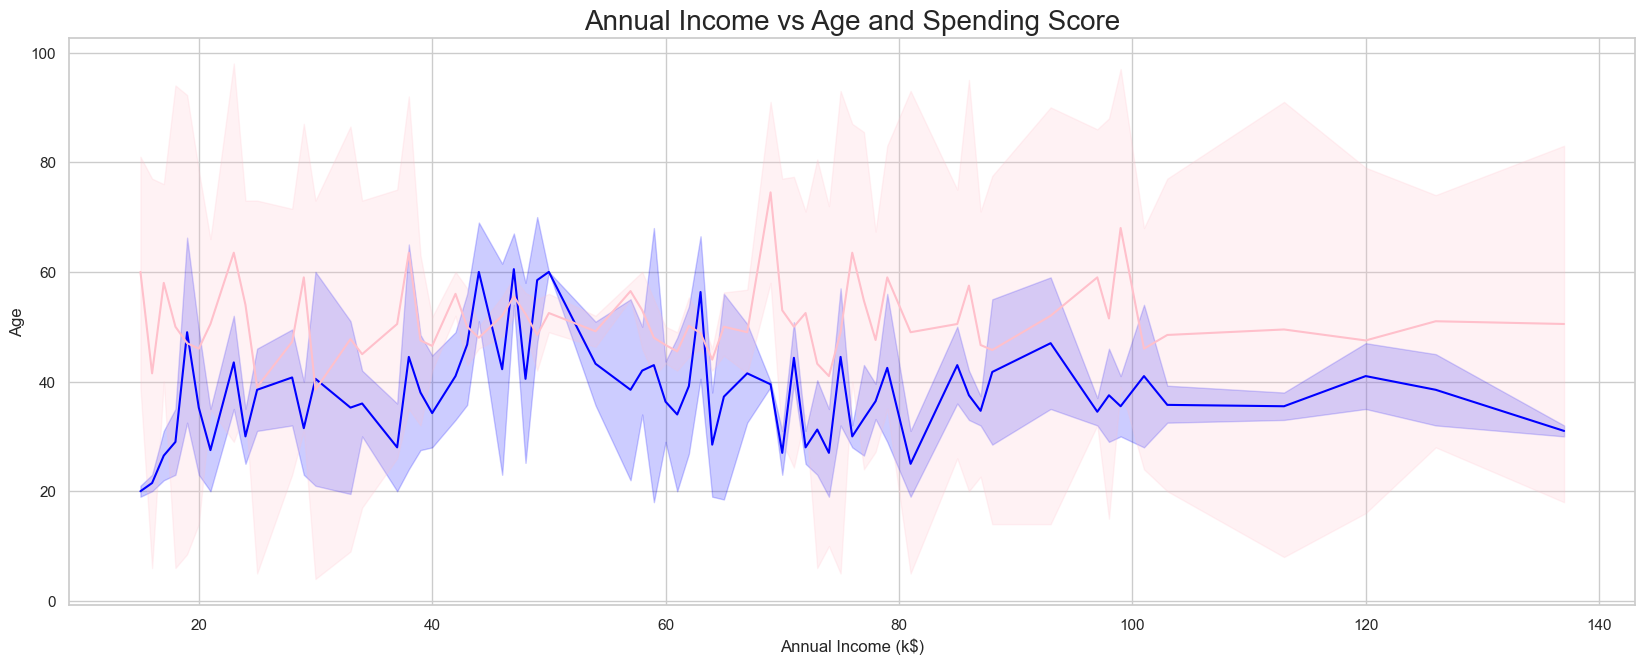

In [27]:
# Annual Income vs Age and Spending Score

x = 'Annual Income (k$)'
y = 'Age'
z = 'Spending Score (1-100)'

sns.lineplot(data,x=x,y=y , color = 'blue')
sns.lineplot(data, x=x, y=z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

> The above Plot Between Annual Income and Age represented by a blue color line, and a plot between Annual Income and the Spending Score represented by a pink color. shows how Age and Spending Varies with Annual Income.

## Clustering Analysis

In [28]:
# we want to perform clusters of Customers who share similar behaviour for that lets select the columns
# Spending score, and Annual Income

import warnings
warnings.filterwarnings('ignore')

# Lets select the Spending score, and Annual Income Columns from the Data
x = data.loc[:, ['Spending Score (1-100)', 'Annual Income (k$)']].values

# let's check the shape of x
print(x.shape)

(200, 2)


In [29]:
# lets also check the data, which we are going to use for the clustering analysis
x_data  = pd.DataFrame(x)
x_data.head()
# where o->Spending Score, and 1->Annual Income

,0,1
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

## Kmeans Algorithm

**The Elbow Method to find the No. of Optimal Clusters**

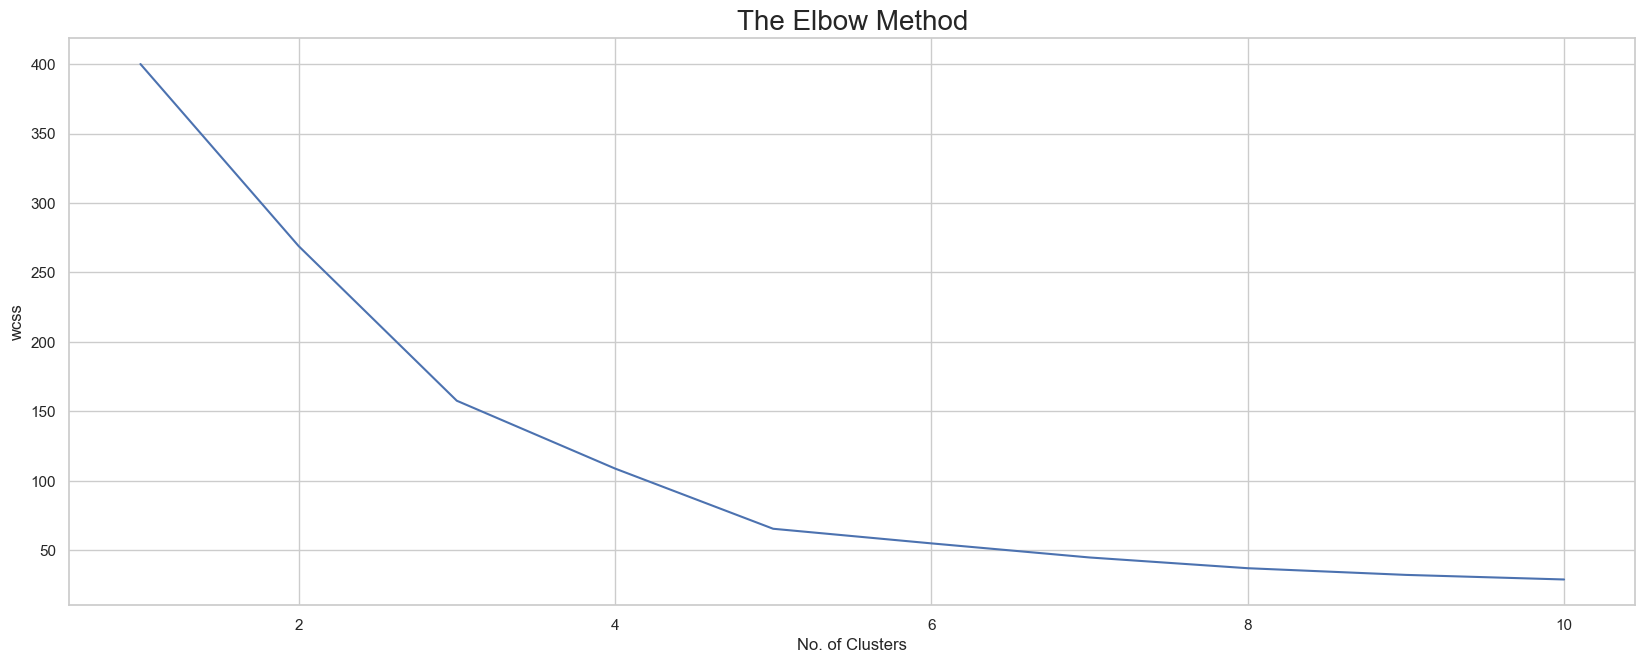

In [31]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x_scaled)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

optimal_clusters =  5


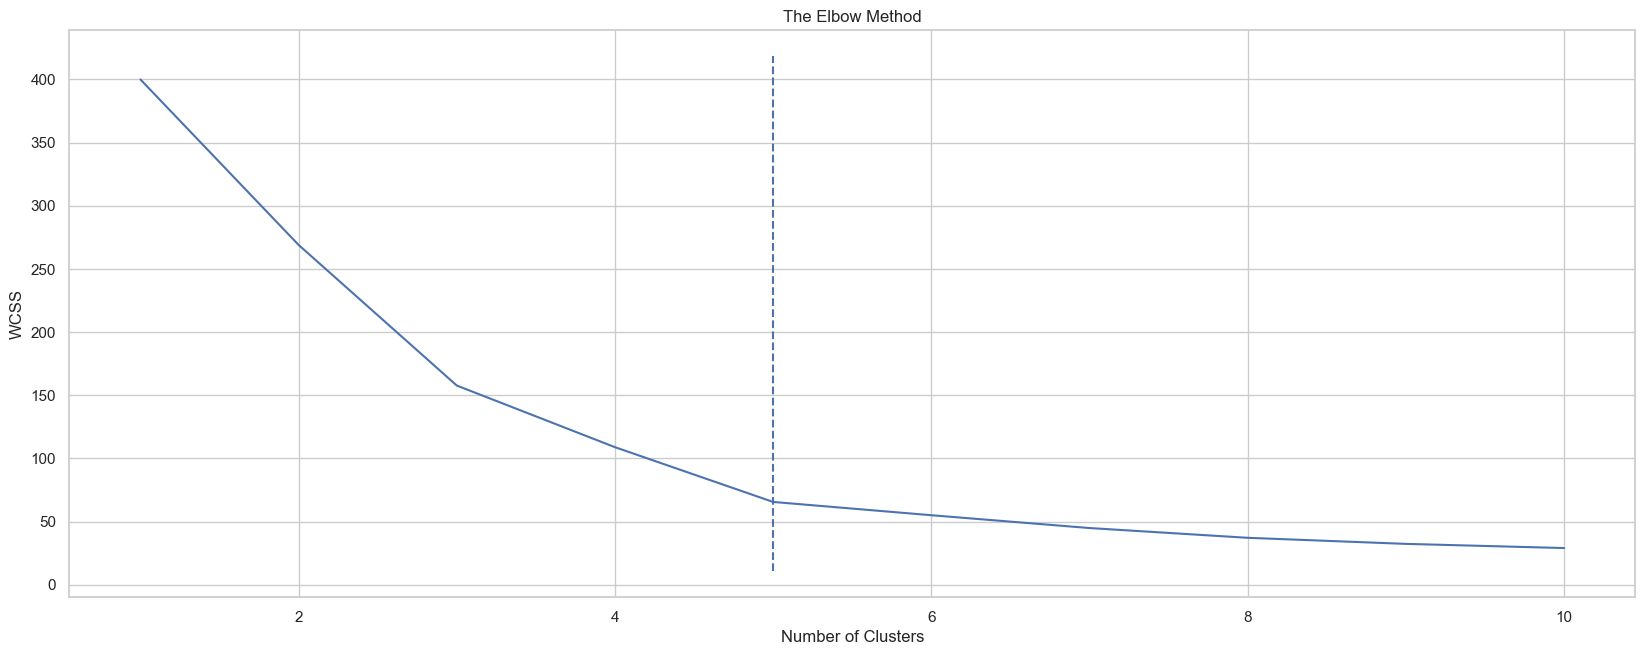

In [32]:
from kneed import KneeLocator
from sklearn.cluster import KMeans

# Calculate Within-Cluster-Sum-of-Squares (WCSS)
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x_scaled)
    wcss.append(km.inertia_)

# Find the optimal number of clusters using KneeLocator
kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
print("optimal_clusters = ", kl.elbow)

# Plot the Elbow curve with the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.vlines(kl.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()


**Visualizaing the Clusters**

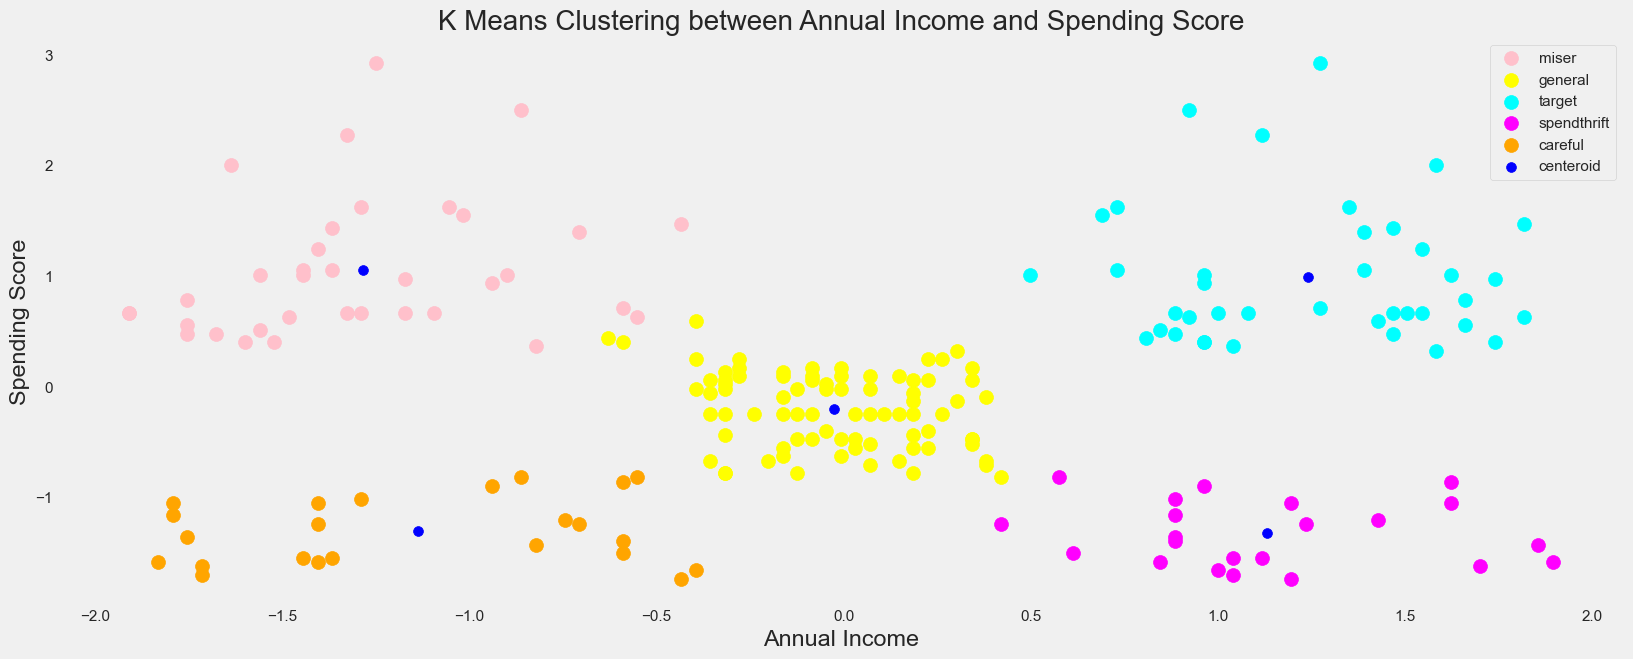

In [33]:
# lets visualize these clusters

plt.style.use('fivethirtyeight')

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x_scaled)

plt.scatter(x_scaled[y_means == 0, 0], x_scaled[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x_scaled[y_means == 1, 0], x_scaled[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x_scaled[y_means == 2, 0], x_scaled[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x_scaled[y_means == 3, 0], x_scaled[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x_scaled[y_means == 4, 0], x_scaled[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering between Annual Income and Spending Score', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

> This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall. There are clearly Five segments of Customers namely Miser, General, Target, Spendthrift,  Careful based on their Annual Income and Spending Score which are reportedly the best factors/attributes to determine the segments of a customer in a Mall.

## Score

In [34]:
# Calculate the Silhouette Coefficient score
from sklearn.metrics import silhouette_score


score = silhouette_score(x_scaled, km.labels_, metric='euclidean')
print("Silhouette Coefficient score:", score)

Silhouette Coefficient score: 0.5546571631111091


## For Age, Income, Spending Score

In [39]:
pip install gap-stat


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\koush\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [43]:
X = data[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values

# Cast the data to float if necessary
X = X.astype(float)

from gap_statistic import OptimalK
# Determine optimal number of clusters using gap statistic
n_clusters = OptimalK(n_jobs=-1)
n_clusters(X, cluster_array=np.arange(1, 7))

# Get the optimal number of clusters
n_clusters_g = n_clusters.n_clusters

print(f'Optimal number of clusters based on gap statistic: {n_clusters_g}')

Optimal number of clusters based on gap statistic: 6


In [42]:
from sklearn.cluster import DBSCAN
# normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# create a DBSCAN object
dbscan = DBSCAN(eps=0.5, min_samples=5)

# fit the data
dbscan.fit(X_scaled)

# get the labels and number of clusters
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# print the results
print('Number of clusters:', n_clusters)

Number of clusters: 6


In [44]:
# Define the parameter grid
param_grid = {
    'n_clusters': range(2, n_clusters_g + 1),
    'init': ['k-means++', 'random'],
    'n_init': [5, 10, 15],
    'max_iter': [100, 200, 300, 400, 500],
    'tol': [0.0001, 0.001, 0.01],
    'algorithm': ['auto', 'full', 'elkan'],
    'random_state': [0, 42, 100]
}

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [46]:
# Create the KMeans object
kmeans = KMeans(random_state=42)

# Perform grid search
grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)
print('Optimal number of clusters based on parameter grid: ' + str(grid_search.best_params_['n_clusters']))

Best hyperparameters:  {'algorithm': 'auto', 'init': 'random', 'max_iter': 100, 'n_clusters': 6, 'n_init': 10, 'random_state': 0, 'tol': 0.01}
Optimal number of clusters based on parameter grid: 6


For n_clusters = 2, the average silhouette score is : 0.29
For n_clusters = 3, the average silhouette score is : 0.38
For n_clusters = 4, the average silhouette score is : 0.41
For n_clusters = 5, the average silhouette score is : 0.44
For n_clusters = 6, the average silhouette score is : 0.45
For n_clusters = 7, the average silhouette score is : 0.44
For n_clusters = 8, the average silhouette score is : 0.43
For n_clusters = 9, the average silhouette score is : 0.39
For n_clusters = 10, the average silhouette score is : 0.38


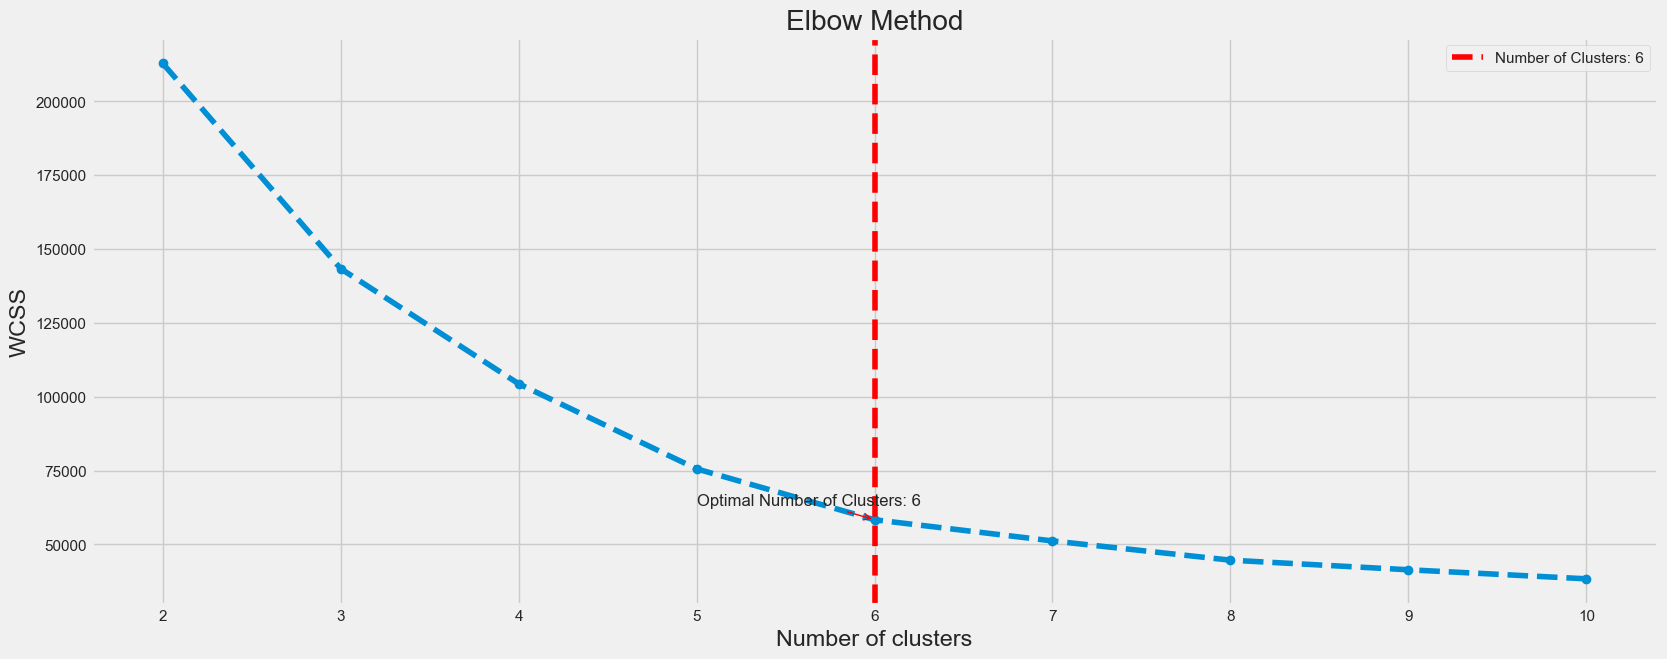

In [47]:
# Use the elbow method to find the optimal number of clusters
wcss = []
range_n_clusters = range(2, 11)
for i in range_n_clusters:
    kmeans = KMeans(n_clusters = i, 
                init=grid_search.best_params_['init'], 
                max_iter=grid_search.best_params_['max_iter'], 
                tol=grid_search.best_params_['tol'], 
                algorithm=grid_search.best_params_['algorithm'], 
                random_state=42
                )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    print(f'For n_clusters = {i}, the average silhouette score is : {round(silhouette_avg, 2)}')
    
plt.plot(range(2, 11), wcss, marker = 'o', linestyle = '--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
# Add a vertical line indicating the number of clusters
n_clusters_g = grid_search.best_params_['n_clusters']
plt.axvline(x=n_clusters_g, linestyle='--', color='red', label=f'Number of Clusters: {n_clusters_g}')
plt.annotate(f'Optimal Number of Clusters: {n_clusters_g}', xy=(n_clusters_g, wcss[n_clusters_g-2]), xytext=(n_clusters_g-1, wcss[n_clusters_g-2]+5000),
            arrowprops=dict(arrowstyle='->',lw=1, color='red'), fontsize=12)
plt.legend()
plt.show()

In [62]:
# We run K-means with a fixed number of clusters. In our case 6.
kmeans = KMeans(n_clusters = n_clusters_g, 
                init=grid_search.best_params_['init'], 
                max_iter=grid_search.best_params_['max_iter'], 
                tol=grid_search.best_params_['tol'], 
                algorithm=grid_search.best_params_['algorithm'], 
                random_state=42
                )

In [63]:
# We divide our data into the 6 clusters.
kmeans.fit(X)
KMeans(init='random', max_iter=100, n_clusters=6, random_state=42, tol=0.01)

KMeans(init='random', max_iter=100, n_clusters=6, random_state=42, tol=0.01)

In [64]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans = data[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [65]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Age,Annual Income (k$),Spending Score (1-100)
Segment K-means,,,
0,27.410256,57.025641,48.769231
1,25.272727,25.727273,79.363636
2,44.318182,25.772727,20.272727
3,41.647059,88.735294,16.764706
4,56.340909,53.704545,49.386364
5,32.692308,86.538462,82.128205


In [66]:
# Compute the size and proportions of the four clusters
df_segm_analysis['N Obs'] = df_segm_kmeans.groupby(['Segment K-means']).size()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()
df_segm_analysis[['Age', 'Annual Income (k$)']]

,Age,Annual Income (k$)
Segment K-means,,
0,27.410256,57.025641
1,25.272727,25.727273
2,44.318182,25.772727
3,41.647059,88.735294
4,56.340909,53.704545
5,32.692308,86.538462


In [67]:
df_segm_analysis.rename({0:'Young Moderate Income',
                         1:'Young Low Income',
                         2:'Middle-aged Low Income',
                         3:'Middle-aged High Income',
                         4:'Senior Moderate Income',
                         5:'Middle-aged High Income'
                        })

,Age,Annual Income (k$),Spending Score (1-100),N Obs,Prop Obs
Segment K-means,,,,,
Young Moderate Income,27.410256,57.025641,48.769231,39,0.195
Young Low Income,25.272727,25.727273,79.363636,22,0.110
Middle-aged Low Income,44.318182,25.772727,20.272727,22,0.110
Middle-aged High Income,41.647059,88.735294,16.764706,34,0.170
Senior Moderate Income,56.340909,53.704545,49.386364,44,0.220
Middle-aged High Income,32.692308,86.538462,82.128205,39,0.195


In [68]:
# Add the segment labels to our table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'Young Moderate Income',
                         1:'Young Low Income',
                         2:'Middle-aged Low Income',
                         3:'Middle-aged High Income',
                         4:'Senior Moderate Income',
                         5:'Middle-aged High Income'
                        })

In [59]:
!pip install plotly

     ---------------------------------------- 0.0/15.3 MB ? eta -:--:--
     ---------------------------------------- 0.1/15.3 MB 1.1 MB/s eta 0:00:14
      --------------------------------------- 0.2/15.3 MB 2.3 MB/s eta 0:00:07
     - -------------------------------------- 0.5/15.3 MB 3.5 MB/s eta 0:00:05
     - -------------------------------------- 0.6/15.3 MB 3.4 MB/s eta 0:00:05
     - -------------------------------------- 0.8/15.3 MB 3.4 MB/s eta 0:00:05
     -- ------------------------------------- 0.8/15.3 MB 3.3 MB/s eta 0:00:05
     -- ------------------------------------- 0.8/15.3 MB 3.3 MB/s eta 0:00:05
     -- ------------------------------------- 0.8/15.3 MB 2.4 MB/s eta 0:00:07
     -- ------------------------------------- 1.1/15.3 MB 2.5 MB/s eta 0:00:06
     --- ------------------------------------ 1.4/15.3 MB 3.0 MB/s eta 0:00:05
     --- ------------------------------------ 1.5/15.3 MB 2.9 MB/s eta 0:00:05
     ---- ----------------------------------- 1.6/15.3 MB 2


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\koush\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [69]:
import plotly.express as px

In [70]:
fig = px.scatter_3d(df_segm_kmeans, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='Labels',
              symbol='Labels', opacity=0.7, size_max=10)

fig.update_layout(
    title={
        'text': "Segmentation Chart - Diego Hurtado",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Annual Income (k$)'),
        zaxis=dict(title='Spending Score (1-100)')),
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"))


fig.show()